In [ ]:
import keras
import numpy
import keras.layers as L
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3

In [ ]:
from tqdm import tqdm

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import tensorflow as tf
import random as rn

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, BatchNormalization
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
pip install -U -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!unzip 'flowers-recognition.zip'

In [ ]:
import os
os.listdir('flowers/')

['tulip', 'sunflower', 'rose', 'daisy', 'dandelion']

In [ ]:
X = []
Z = []
image_size = 150
FLOWER_TULIP_DIR = "flowers/tulip/"
FLOWER_SUNFLOWER_DIR = "flowers/sunflower/"
FLOWER_ROSE_DIR = "flowers/rose"
FLOWER_DAISY_DIR = "flowers/daisy"
FLOWER_DANDELION_DIR = "flowers/dandelion/"

In [ ]:
def assign_labels(img,flower_type):
  return flower_type

In [ ]:
def make_train_data(DIR,flower_type):
  for img in tqdm(os.listdir(DIR)):
    label = assign_labels(img,flower_type)
    path = os.path.join(DIR,img)
    img = image.load_img(path,target_size=(image_size,image_size,3))
    img = image.img_to_array(img)
    img = img/255
    X.append(img)
    Z.append(label)

In [ ]:
make_train_data(FLOWER_DAISY_DIR,'daisy')
make_train_data(FLOWER_ROSE_DIR,'rose')
make_train_data(FLOWER_TULIP_DIR,'tulip')
make_train_data(FLOWER_SUNFLOWER_DIR,'sunflower')

100%|██████████| 734/734 [00:02<00:00, 281.76it/s]


In [ ]:
make_train_data(FLOWER_DANDELION_DIR,'dandelion')

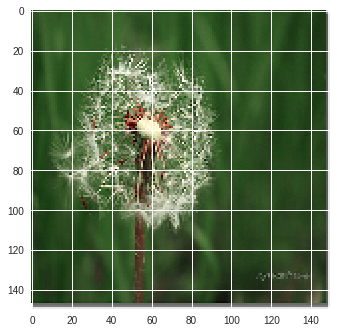

In [ ]:
plt.imshow(X[-1])

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)

In [ ]:
X_train.shape

(2780, 150, 150, 3)

In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state =42 )

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [ ]:
Model = Sequential()
Model.add(Conv2D(filters= 32, kernel_size  = (3,3), strides = (1,1),padding = 'same', activation='relu',input_shape= (150,150,3)))
Model.add(MaxPool2D((2,2)))

Model.add(Conv2D(filters= 64, kernel_size  = (3,3), strides = (1,1),padding = 'same', activation='relu'))
Model.add(MaxPool2D((2,2)))

Model.add(Conv2D(filters= 96, kernel_size  = (3,3), strides = (1,1),padding = 'same', activation='relu',input_shape= (150,150,3)))
Model.add(MaxPool2D((2,2)))

Model.add(Conv2D(filters= 128, kernel_size  = (3,3), strides = (1,1),padding = 'same', activation='relu',input_shape= (150,150,3)))
Model.add(MaxPool2D((2,2)))

Model.add(Flatten())
Model.add(Dense(512))
Model.add(Activation('relu'))

Model.add(Dense(5,activation='softmax'))

In [ ]:
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_197 (Conv2D)          (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_200 (Conv2D)          (None, 18, 18, 128)       110720    
__________

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
datagen.fit(X_train)

In [ ]:
Model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = Model.fit_generator(datagen.flow(X_train,Y_train,batch_size=32),epochs=25,verbose=1,validation_data=(X_test,Y_test),steps_per_epoch=X_train.shape[0] // 32)

Epoch 1/25
86/86 [==============================] - 18s 204ms/step - loss: 0.7168 - acc: 0.7238 - val_loss: 0.7495 - val_acc: 0.7238
Epoch 2/25
86/86 [==============================] - 17s 198ms/step - loss: 0.7215 - acc: 0.7220 - val_loss: 0.7793 - val_acc: 0.7141
Epoch 3/25
86/86 [==============================] - 16s 191ms/step - loss: 0.6561 - acc: 0.7494 - val_loss: 0.7165 - val_acc: 0.7400
Epoch 4/25
86/86 [==============================] - 17s 194ms/step - loss: 0.6253 - acc: 0.7642 - val_loss: 0.6755 - val_acc: 0.7476
Epoch 5/25
86/86 [==============================] - 17s 201ms/step - loss: 0.6524 - acc: 0.7580 - val_loss: 0.8790 - val_acc: 0.6796
Epoch 6/25
86/86 [==============================] - 17s 192ms/step - loss: 0.6183 - acc: 0.7642 - val_loss: 0.7624 - val_acc: 0.7465
Epoch 7/25
86/86 [==============================] - 17s 192ms/step - loss: 0.6098 - acc: 0.7678 - val_loss: 0.7575 - val_acc: 0.7271
Epoch 8/25
86/86 [==============================] - 17s 199ms/step - 